In [1]:
require(tidyverse)

Loading required package: tidyverse

Warning message:
"package 'tidyverse' was built under R version 3.6.2"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.2"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
k_17 <- read.csv("table_export_DATA_2017.csv")

In [3]:
str(k_17)

'data.frame':	1616708 obs. of  13 variables:
 $ POST_DATE       : Factor w/ 362 levels "01/01/2017","01/02/2017",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ EMP_NUM         : int  813809 813809 823520 827190 823520 827190 823520 823520 827190 827190 ...
 $ SUP_EMP_NUM     : int  823148 823148 836281 836281 836281 836281 836281 836281 836281 836281 ...
 $ WORK_ORDER      : int  160576602 160671460 160663963 160599056 160599475 160664107 160669748 160663964 160664102 160664107 ...
 $ OPERATION_NUM   : int  50 50 20 10 20 10 10 10 10 20 ...
 $ QUANTITY        : int  5 2 10 1 10 1 10 10 1 1 ...
 $ HRS             : num  0.25 0.24 0.3 0.93 0.25 0.37 1.06 1.68 1.9 1.42 ...
 $ HRS_CLASS       : Factor w/ 4 levels "R","S","T","V": 1 1 1 1 1 1 1 1 1 1 ...
 $ TYPE            : Factor w/ 6 levels "","ZP03","ZP06",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ PRODUCT_LINE    : int  79 79 26 26 26 26 26 26 26 26 ...
 $ PRODUCT_CELL_ID : int  370 370 397 1362 397 921 397 397 921 921 ...
 $ ROUTING_GROUP_ID: int  4955 4955 4994

In [4]:
summary(k_17)

      POST_DATE          EMP_NUM        SUP_EMP_NUM       WORK_ORDER       
 11/16/2017:   7814   Min.   :603837   Min.   :705050   Min.   : 16875303  
 11/21/2017:   7555   1st Qu.:818954   1st Qu.:823708   1st Qu.:161062715  
 10/26/2017:   7537   Median :827292   Median :827659   Median :161469626  
 11/30/2017:   7502   Mean   :829962   Mean   :831245   Mean   :161382538  
 12/14/2017:   7451   3rd Qu.:840449   3rd Qu.:840323   3rd Qu.:161880557  
 08/17/2017:   7439   Max.   :849818   Max.   :852382   Max.   :162328204  
 (Other)   :1571410                    NA's   :137                         
 OPERATION_NUM       QUANTITY             HRS           HRS_CLASS  
 Min.   :   1.0   Min.   :   1.000   Min.   :-40.0000   R:1373280  
 1st Qu.:  40.0   1st Qu.:   1.000   1st Qu.:  0.1100   S:     10  
 Median :  90.0   Median :   2.000   Median :  0.2400   T: 243403  
 Mean   : 196.3   Mean   :   6.511   Mean   :  0.4162   V:     15  
 3rd Qu.: 200.0   3rd Qu.:   6.000   3rd Qu.:  0.510

In [7]:
k_17$POST_DATE <- as.Date(k_17$POST_DATE)
k_17$EMP_NUM <- as.factor(k_17$EMP_NUM)
k_17$SUP_EMP_NUM <- as.factor(k_17$SUP_EMP_NUM)
k_17$WORK_ORDER <- as.factor(k_17$WORK_ORDER)
k_17$OPERATION_NUM <- as.factor(k_17$OPERATION_NUM)
k_17$PRODUCT_LINE <- as.factor(k_17$PRODUCT_LINE)
k_17$PRODUCT_CELL_ID <- as.factor(k_17$PRODUCT_CELL_ID)
k_17$ROUTING_GROUP_ID <- as.factor(k_17$ROUTING_GROUP_ID)
k_17$DOC <- as.factor(k_17$DOC)

In [11]:
sapply(k_17,function(x) sum(is.na(x)))

POST_DATE          EMP_NUM      SUP_EMP_NUM       WORK_ORDER 
         1010167                0              137                0 
   OPERATION_NUM         QUANTITY              HRS        HRS_CLASS 
               0                3                0                0 
            TYPE     PRODUCT_LINE  PRODUCT_CELL_ID ROUTING_GROUP_ID 
               0                0                0                0 
             DOC 
               0

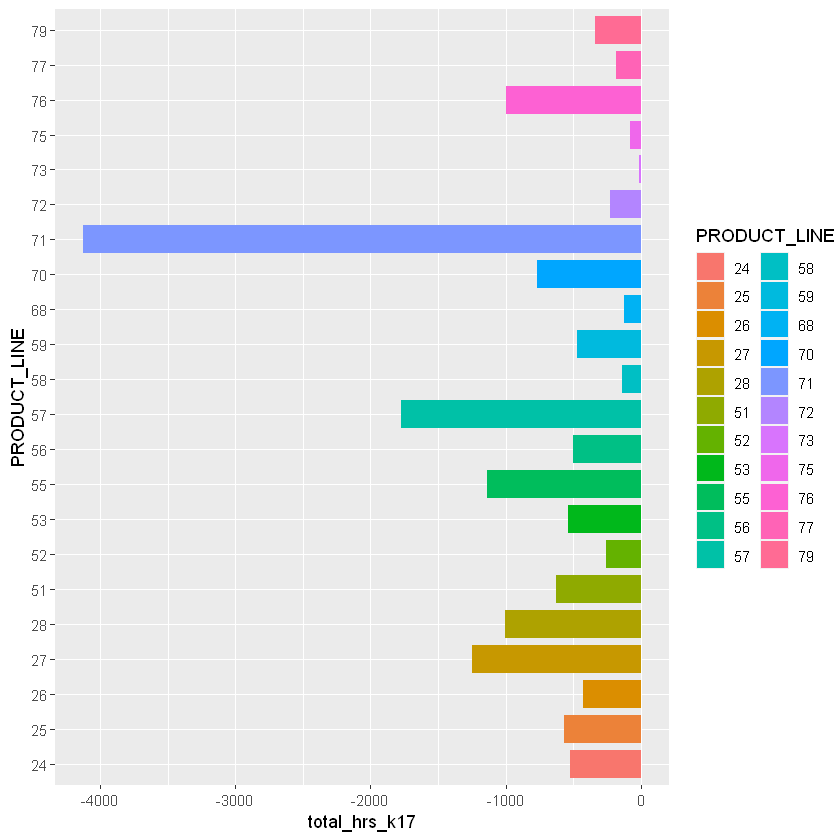

In [28]:
corrected_k17 <- filter(k_17,HRS<0)
A <- group_by(corrected_k17,PRODUCT_LINE) 
B <- arrange(summarise(A,total_hrs_k17 = sum(HRS)),total_hrs_k17)
B<- arrange(B,total_hrs_k17)
ggplot(B) + geom_bar(stat = "identity",width = 0.8,aes(x = PRODUCT_LINE,y = total_hrs_k17,fill = PRODUCT_LINE)) + coord_flip()

In [23]:
head(B)

PRODUCT_LINE,total_hrs_k17
<fct>,<dbl>
71,-4128.08
57,-1775.20
27,-1249.43
55,-1135.95
28,-1003.57
76,-997.47


In [24]:
k_18 <- read.csv("table_export_DATA_2018.csv")
k_18$POST_DATE <- as.Date(k_18$POST_DATE)
k_18$EMP_NUM <- as.factor(k_18$EMP_NUM)
k_18$SUP_EMP_NUM <- as.factor(k_18$SUP_EMP_NUM)
k_18$WORK_ORDER <- as.factor(k_18$WORK_ORDER)
k_18$OPERATION_NUM <- as.factor(k_18$OPERATION_NUM)
k_18$PRODUCT_LINE <- as.factor(k_18$PRODUCT_LINE)
k_18$PRODUCT_CELL_ID <- as.factor(k_18$PRODUCT_CELL_ID)
k_18$ROUTING_GROUP_ID <- as.factor(k_18$ROUTING_GROUP_ID)
k_18$DOC <- as.factor(k_18$DOC)

In [25]:
sapply(k_18,function(x) sum(is.na(x)))

POST_DATE          EMP_NUM      SUP_EMP_NUM       WORK_ORDER 
         1163066                0                0                0 
   OPERATION_NUM         QUANTITY              HRS        HRS_CLASS 
               0                0                0                0 
            TYPE     PRODUCT_LINE  PRODUCT_CELL_ID ROUTING_GROUP_ID 
               0                0                0                0 
             DOC 
               0

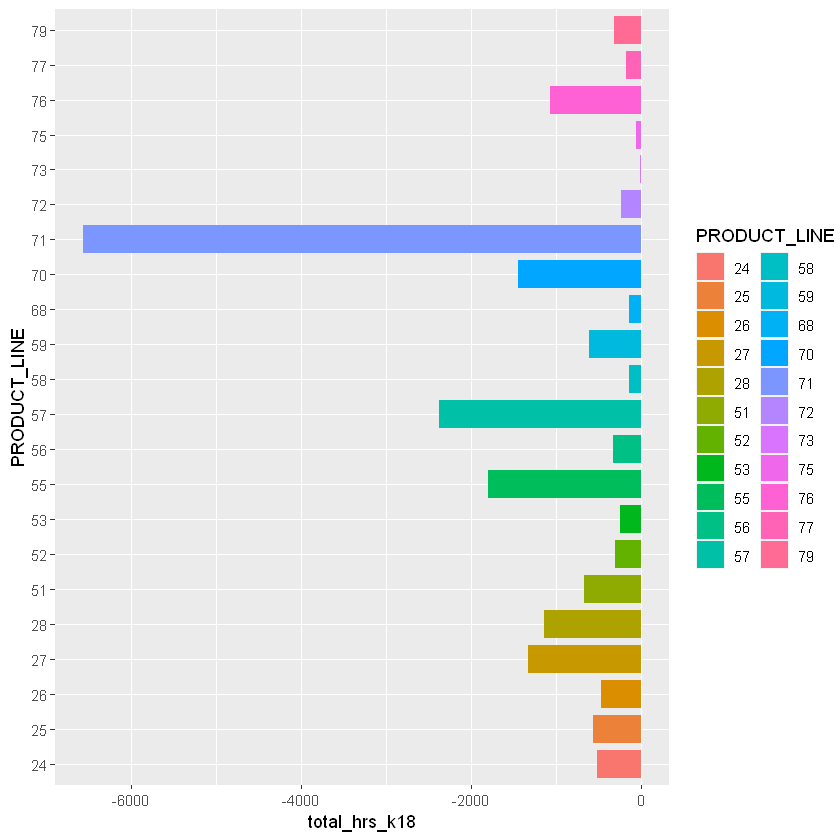

In [26]:
corrected_k18 <- filter(k_18,HRS<0)
C <- group_by(corrected_k18,PRODUCT_LINE) 
D <- arrange(summarise(C,total_hrs_k18 = sum(HRS)),total_hrs_k18)
D<- arrange(D,total_hrs_k18)
ggplot(D) + geom_bar(stat = "identity",width = 0.8,aes(x = PRODUCT_LINE,y = total_hrs_k18,fill = PRODUCT_LINE)) + coord_flip()

In [27]:
head(D)

PRODUCT_LINE,total_hrs_k18
<fct>,<dbl>
71,-6567.43
57,-2371.82
55,-1804.87
70,-1442.37
27,-1329.66
28,-1144.63


In [29]:
k_19 <- read.csv("table_export_DATA_2019.csv")
k_19$POST_DATE <- as.Date(k_19$POST_DATE)
k_19$EMP_NUM <- as.factor(k_19$EMP_NUM)
k_19$SUP_EMP_NUM <- as.factor(k_19$SUP_EMP_NUM)
k_19$WORK_ORDER <- as.factor(k_19$WORK_ORDER)
k_19$OPERATION_NUM <- as.factor(k_19$OPERATION_NUM)
k_19$PRODUCT_LINE <- as.factor(k_19$PRODUCT_LINE)
k_19$PRODUCT_CELL_ID <- as.factor(k_19$PRODUCT_CELL_ID)
k_19$ROUTING_GROUP_ID <- as.factor(k_19$ROUTING_GROUP_ID)
k_19$DOC <- as.factor(k_19$DOC)

In [30]:
sapply(k_19, function(x) sum(is.na(x)))

POST_DATE          EMP_NUM      SUP_EMP_NUM       WORK_ORDER 
         1342455                0                0                0 
   OPERATION_NUM         QUANTITY              HRS        HRS_CLASS 
               0                0                0                0 
            TYPE     PRODUCT_LINE  PRODUCT_CELL_ID ROUTING_GROUP_ID 
               0                0                0                0 
             DOC 
               0

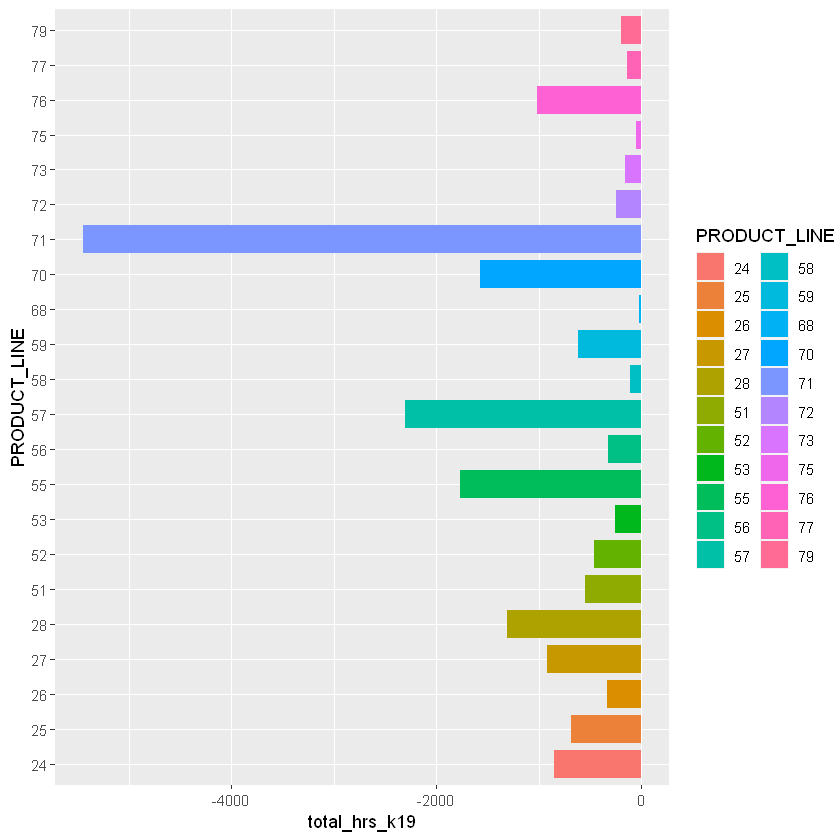

In [32]:
corrected_k19 <- filter(k_19,HRS<0)
E <- group_by(corrected_k19,PRODUCT_LINE) 
F <- arrange(summarise(E,total_hrs_k19 = sum(HRS)),total_hrs_k19)
F <- arrange(F,total_hrs_k19)
ggplot(F) + geom_bar(stat = "identity",width = 0.8,aes(x = PRODUCT_LINE,y = total_hrs_k19,fill = PRODUCT_LINE)) + coord_flip()

In [33]:
head(F)

PRODUCT_LINE,total_hrs_k19
<fct>,<dbl>
71,-5453.04
57,-2302.80
55,-1764.52
70,-1568.08
28,-1307.78
76,-1012.07


In [73]:
corrected_hours <- full_join(B,D,by = c("PRODUCT_LINE"))
corrected_hours <- full_join(corrected_hours,F,by = c("PRODUCT_LINE"))
corrected_hours[,-c(3,5,7)]

PRODUCT_LINE,total_hrs_k17,total_hrs_k18,total_hrs_k19
<fct>,<dbl>,<dbl>,<dbl>
71,-4128.08,-6567.43,-5453.04
57,-1775.20,-2371.82,-2302.80
27,-1249.43,-1329.66,-919.24
55,-1135.95,-1804.87,-1764.52
28,-1003.57,-1144.63,-1307.78
76,-997.47,-1066.30,-1012.07
70,-767.58,-1442.37,-1568.08
51,-630.72,-669.93,-542.44
25,-566.84,-569.38,-686.04


In [101]:
k_18_selection <- select(k_18,PRODUCT_LINE,ROUTING_GROUP_ID,QUANTITY,HRS)
k_19_selection <- select(k_19,PRODUCT_LINE,ROUTING_GROUP_ID,QUANTITY,HRS)




PRODUCT_LINE == 73 & HRS < 0
<lgl>
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE


In [91]:
(t <- data.frame(summary(pl_73_19$ROUTING_GROUP_ID)))

,summary.pl_73_19.ROUTING_GROUP_ID.
,<int>
3092,857
3093,360
3051,187
3118,77
3073,47
3103,39
3056,8
3061,5
3105,5
